In [1]:
import pandas as pd
import networkx as nx
import numpy as np
import os
import matplotlib.pyplot as plt
!pip install folium
import folium
import os
import seaborn as sns

## Exploration

### Top Hubs

In [82]:
# This function calculates the five most important stations in the network across all 25 cities, with their names.
def top_5_hubs(network_nodes, network_combined,city):

    G = nx.from_pandas_edgelist(network_combined, source='from_stop_I', target='to_stop_I', create_using=nx.DiGraph(),
                                edge_attr=['d', 'duration_avg', 'n_vehicles', 'route_I_counts'])
    degree_centrality = nx.degree_centrality(G)
    sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
    return network_nodes[network_nodes['stop_I'].isin([node for node, centrality in sorted_degree[:5]])][["name"]].rename(columns={'name': city}).reset_index(drop=True)

In [84]:
dataframes = []  # Create an empty list to store the dataframes
cities = os.listdir("../extracted_files")

# Iterate over each city and call the top_5_hubs function
for city in cities:
    network_nodes = pd.read_csv('../extracted_files/' + city + '/network_nodes.csv', sep=';')
    network_combined = pd.read_csv('../extracted_files/' + city + '/network_combined.csv', sep=';')
    df = top_5_hubs(network_nodes, network_combined, city)
    dataframes.append(df)

# Concatenate the dataframes vertically
concatenated_df = pd.concat(dataframes, axis=1)

# Reset the index
concatenated_df.reset_index(drop=True, inplace=True)

#save table as image

In [88]:
concatenated_df = concatenated_df.T
#column should go from 1 to 5
concatenated_df.columns = [i for i in range(1,6)]
concatenated_df

,1,2,3,4,5
paris,Bourg-la-Reine,JUVISY,AULNAY SOUS BOIS,BOURG LA REINE,PARIS SAINT-LAZARE
detroit,Moross & Mack,State Fairgrounds Transit Center,WASHINGTON BLVD & MICHIGAN,LARNED & WOODWARD (CITY CNTY.BLDG.),ROSA PARKS TRANSIT 31 WB
melbourne,North Melbourne Railway Station (West Melbourne),Sunshine Railway Station (Sunshine),Caulfield Railway Station (Caulfield East),Broadmeadows Railway Station (Broadmeadows),Richmond Railway Station (Richmond)
luxembourg,"Eich, Eecher Plaz","Kirchberg, John-F.-Kennedy","Centre, Charlys Gare","Luxembourg, Gare Centrale","Mersch, Gare"
helsinki,Lapinrinne,Viikki,Laivalahdenportti,Sateentie,Kirkkotallintie
dublin,"Dublin City South, Ashfield House","Trinity College, Shaw Street","Temple Bar, Central Bank",Howth Junction and Donaghmede Train Station,Connolly Train Station
adelaide,Adelaide Railway Station,Stop 24 Crafers Ramp - South side,Stop T3 Grenfell St - South side,Stop 24A / Zone A Crafers Park N Ride,Stop 49/B Church St - East side
palermo,PIAZZALE JOHN LENNON MONTE,RESUTTANA,GIOTTO - REGIONE SICILIANA,STAZIONE CENTRALE - PENSILINA INTERNA,REGIONE SICILIANA - DE SALIBA
turku,Cygnaeuksen koulu,Brahenkatu,Posti,Posti,Brahenkatu
toulouse,Eisenhower,Mesplé,Mesplé,Lycée Toulouse-Lautrec,Andromède-Lycée


In [91]:
concatenated_df.to_latex('top_5_hubs.tex')

### Degree analysis

#### Mean degree

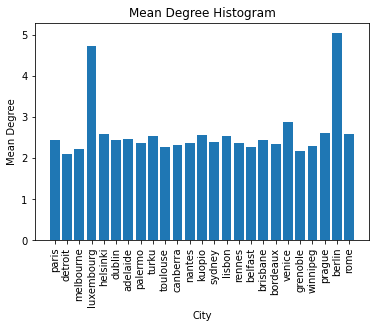

In [37]:
#iterate over all cities (stored in extraced_files/city/combined_df), get degree mean and plot in one histogram all cities mean degree
cities_values=[]
#directory
cities = os.listdir("../extracted_files")
for city in cities:
    combined_df = pd.read_csv(f"../extracted_files/{city}/network_combined.csv", delimiter=";")
    G = nx.from_pandas_edgelist(combined_df, source='from_stop_I', target='to_stop_I', create_using=nx.DiGraph(),
                                edge_attr=['d', 'duration_avg', 'n_vehicles', 'route_I_counts'])
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence: creating a sorted list
    cities_values.append(np.mean(degree_sequence))

#plot
fig, ax = plt.subplots()
ax.bar(cities, cities_values)
ax.set_title("Mean Degree Histogram")
ax.set_ylabel("Mean Degree")
ax.set_xlabel("City")
plt.xticks(rotation=90)
plt.show()
#save
fig.savefig('../assets/mean_degree_histogram.png', dpi=300, bbox_inches='tight')

#### Degree distribution

/Users/giomonopoli/miniconda3/envs/adaexam/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/giomonopoli/miniconda3/envs/adaexam/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/giomonopoli/miniconda3/envs/adaexam/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code

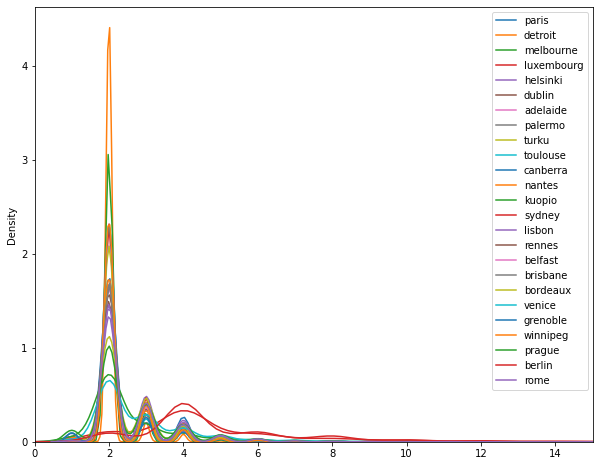

In [40]:
plt.figure(figsize=(10, 8))

cities = os.listdir("../extracted_files")

for city in cities:
    combined_df = pd.read_csv(f"../extracted_files/{city}/network_combined.csv", delimiter=";")
    G = nx.from_pandas_edgelist(combined_df, source='from_stop_I', target='to_stop_I', create_using=nx.DiGraph(),
                                edge_attr=['d', 'duration_avg', 'n_vehicles', 'route_I_counts'])
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence: creating a sorted list
    sns.distplot(degree_sequence, hist=False, kde=True, label=city)

plt.xlim(0,15)
plt.legend()
plt.savefig('../assets/degree_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
    

### Berlin congestion analysis

In [113]:
#get berlin graph 
berlin_df = pd.read_csv("../extracted_files/berlin/network_combined.csv", delimiter=";")
G = nx.from_pandas_edgelist(berlin_df, source='from_stop_I', target='to_stop_I', create_using=nx.DiGraph(),
                                edge_attr=['d', 'duration_avg', 'n_vehicles', 'route_I_counts'])

In [114]:
network_nodes = pd.read_csv("../extracted_files/berlin/network_nodes.csv", delimiter=";")

# calculate edge betweenness centrality
edge_betweenness = nx.edge_betweenness_centrality(G)

# sort edges by betweenness centrality values
sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)

# select top few congested links
congested_links = sorted_edges[:5] # change 5 to the desired number of congested links
for link in congested_links:
        from_stop_I = link[0][0]
        to_stop_I = link[0][1]
        from_stop_name = network_nodes[network_nodes['stop_I']==from_stop_I]['name'].values[0]
        to_stop_name = network_nodes[network_nodes['stop_I']==to_stop_I]['name'].values[0]
        print(f"Link between {from_stop_name} and {to_stop_name} is congested.")

Link between S+U Gesundbrunnen Bhf (Berlin) and S+U Lichtenberg Bhf (Berlin) is congested.
Link between S+U Lichtenberg Bhf (Berlin) and S+U Gesundbrunnen Bhf (Berlin) is congested.
Link between S+U Berlin Hauptbahnhof (tief) and S+U Potsdamer Platz Bhf (Berlin) is congested.
Link between S+U Berlin Hauptbahnhof (tief) and S+U Gesundbrunnen Bhf (Berlin) is congested.
Link between S+U Potsdamer Platz Bhf (Berlin) and S+U Berlin Hauptbahnhof (tief) is congested.


### All cities congestion analysis (not run, too slow)

In [115]:
# This function calculates the 2 most important edges in the network using the edge betweenness centrality measure, for all cities, and return the names of the edge 
def get_congested_links(city):
    combined_df = pd.read_csv(f"../extracted_files/{city}/network_combined.csv", delimiter=";")
    G = nx.from_pandas_edgelist(combined_df, source='from_stop_I', target='to_stop_I', create_using=nx.DiGraph(),
                                edge_attr=['d', 'duration_avg', 'n_vehicles', 'route_I_counts'])

    edge_betweenness = nx.edge_betweenness_centrality(G)

    # sort edges by betweenness centrality values
    sorted_edges = sorted(edge_betweenness.items(), key=lambda x: x[1], reverse=True)

    # select top few congested links
    congested_links = sorted_edges[:2] # change 5 to the desired number of congested links

    # get the names of the congested links from id
    congested_links_names = []
    for link in congested_links:
        from_stop_I = link[0][0]
        to_stop_I = link[0][1]
        from_stop_name = network_nodes[network_nodes['stop_I']==from_stop_I]['name'].values[0]
        to_stop_name = network_nodes[network_nodes['stop_I']==to_stop_I]['name'].values[0]
        congested_links_names.append((from_stop_name,to_stop_name))

    return congested_links_names

links = []
for city in cities:
    congested_links = get_congested_links(city)
    links.append(congested_links)


KeyboardInterrupt: 

### Class balanceness / occurence of classes

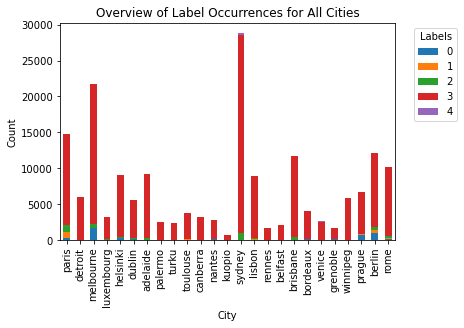

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval

total_counts = pd.DataFrame()

for city in cities:
    df = pd.read_csv(f"../processed_files/{city}_edge_list.csv")[['label']]
    df["label"] = df["label"].apply(lambda x: literal_eval(x))
    # Convert lists to numpy arrays for easy summing
    arr = np.array(df.iloc[:, 0].tolist())
    sum_arr = np.sum(arr, axis=0)

    # Add the summed array to the total_counts dataframe
    total_counts[city] = sum_arr

# Plotting
total_counts.transpose().plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Overview of Label Occurrences for All Cities')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1), title="Labels")
#save
plt.savefig('../assets/label_occurences.png', bbox_inches='tight')
plt.show()


In [117]:
import numpy as np
import pandas as pd
#do value_counts on route_type for all cities, and sum all the values to have an unique value_counts for all cities
arr_sum = np.zeros(6)
cities = os.listdir("../extracted_files")
for city in cities:
    # Read the combined network file
    combined_df = pd.read_csv(f"../extracted_files/{city}/network_combined.csv",delimiter=";")
    value_count = combined_df['route_type'].value_counts().index
    for i in value_count:
        arr_sum[i] += combined_df['route_type'].value_counts()[i]

np.set_printoptions(suppress=True)
print(arr_sum)

[  5213.   1590.   4507. 169799.    609.      4.]


### Visualisation

In [18]:
field_locations = '../extracted_files/berlin/routes.geojson'
def field_type_colour(feature):
    if feature['properties']['route_type'] == 1:
        #red
        return "#FF0000"
    elif feature['properties']['route_type'] == 2:
        #blue
        return '#0000FF'
    elif feature['properties']['route_type'] == 3:
        return "#FFFF00"

In [22]:
m = folium.Map(location=[52.52, 13.4], 
                 zoom_start=9, control_scale=True)

folium.GeoJson(field_locations, name='geojson', 
               tooltip=folium.GeoJsonTooltip(fields=['route_name']),
               style_function= lambda feature: {'color':field_type_colour(feature), 'weight':0.7}
              ).add_to(m)
m

#### Calculate distance between stations (not continued)

In [12]:
from math import radians, cos, sin, asin, sqrt

# Define a function to calculate the distance between two points using Haversine formula
def haversine(lon1, lat1, lon2, lat2):
    R = 6372.8 # Earth radius in kilometers

    dLat = radians(lat2 - lat1)
    dLon = radians(lon2 - lon1)
    lat1 = radians(lat1)
    lat2 = radians(lat2)

    a = sin(dLat/2)**2 + cos(lat1)*cos(lat2)*sin(dLon/2)**2
    c = 2*asin(sqrt(a))

    return R*c


In [22]:
network_nodes = pd.read_csv("../extracted_files/berlin/network_nodes.csv", delimiter=";")

# Define the distance threshold below which two stations are considered "very near"
threshold = 0.1 # kilometers
station_equality = []
# Loop over all pairs of stations and merge them if they are very near each other
for i, row1 in network_nodes.iterrows():
    for j, row2 in network_nodes.iterrows():
        if i >= j:
            continue
        distance = haversine(row1['lon'], row1['lat'], row2['lon'], row2['lat'])
        if distance < threshold:
            station_equality.append((row1['name'], row2['name'],distance))
            print(f"Stations {row1['name']} and {row2['name']} are very near (distance = {distance:.2f} km). Merging...")
            # Merge the two stations here (e.g., update the station name, or assign a new station ID, etc.)

Stations U Turmstr. (Berlin) and U Turmstr. (Berlin) [Bus Turmstr.] are very near (distance = 0.06 km). Merging...
Stations U Turmstr. (Berlin) and U Turmstr. (Berlin) [Bus Alt-Moabit] are very near (distance = 0.06 km). Merging...
Stations U Turmstr. (Berlin) [Bus Turmstr.] and U Turmstr. (Berlin) [Bus Stromstr.] are very near (distance = 0.09 km). Merging...
Stations U Turmstr. (Berlin) [Bus Turmstr.] and U Turmstr. (Berlin) [Bus Alt-Moabit] are very near (distance = 0.09 km). Merging...
Stations U Turmstr. (Berlin) [Bus Stromstr.] and U Turmstr. (Berlin) [Bus Alt-Moabit] are very near (distance = 0.08 km). Merging...
Stations S+U Berlin Hauptbahnhof (tief) and S+U Berlin Hauptbahnhof are very near (distance = 0.09 km). Merging...
Stations Köbisstr. (Berlin) and Hiroshimasteg (Berlin) are very near (distance = 0.09 km). Merging...
Stations Residenzstr./Reginhardstr. (Berlin) and Ritterlandweg (Berlin) are very near (distance = 0.07 km). Merging...
Stations U Kottbusser Tor (Berlin) a

KeyboardInterrupt: 